<a href="https://colab.research.google.com/github/janerysn/J-Data-Science/blob/main/J_SKB_Prediksi_Persetujuan_Kredit_Rumah_Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Sistem Kecerdasan Bisnis | Prediksi Persetujuan Kredit Rumah | Random Forest**

Our team members :

1. Zahra Jane Arnecia
2. Husein Zidan
3. Dwy Laila Safitry
4. Noviana Rosianti
5. Erin Divayaning

In [ ]:
pip install graphviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import _tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset skb projcet 2/loan_sanction_train.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Cleaning

Check Duplicate

In [ ]:
df.duplicated().sum()

0

Check Missing Value

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
df['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
160.0,12
187.0,12
...,...
240.0,1
214.0,1
59.0,1


In [ ]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Imputation

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

<ipython-input-225-165f2201361a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-225-165f2201361a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Check Outlier

In [ ]:
df_numeric = df.select_dtypes(include=[int, float])

In [ ]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_numeric< lower_bound) | (df_numeric> upper_bound)).any(axis=1)

In [ ]:
df_outliers_iqr = df[outliers_iqr]
df_outliers_iqr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,128.0,180.0,1.0,Urban,N
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
df_outliers_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 5 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            218 non-null    object 
 1   Gender             218 non-null    object 
 2   Married            218 non-null    object 
 3   Dependents         218 non-null    object 
 4   Education          218 non-null    object 
 5   Self_Employed      218 non-null    object 
 6   ApplicantIncome    218 non-null    int64  
 7   CoapplicantIncome  218 non-null    float64
 8   LoanAmount         218 non-null    float64
 9   Loan_Amount_Term   218 non-null    float64
 10  Credit_History     218 non-null    float64
 11  Property_Area      218 non-null    object 
 12  Loan_Status        218 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 23.8+ KB


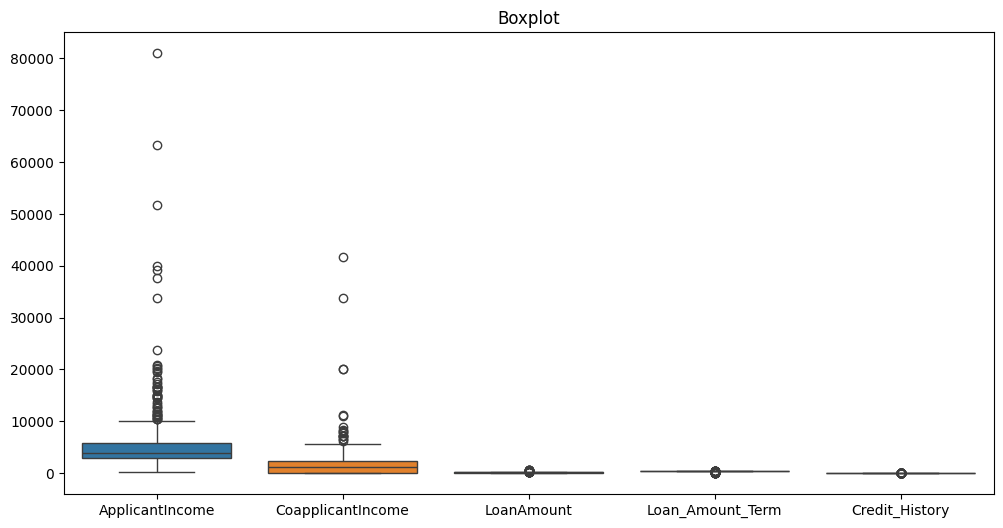

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.title("Boxplot")
plt.show()

Mengatasi Outliers Dengan Teknik Log Transformation

In [ ]:
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972811,0.000000,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,8.320448,0.000000,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8.996280,5.484797,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,8.933796,0.000000,187.0,360.0,1.0,Urban,Y


Menghapus fitur yang tidak relevan/tidak dibutuhkan

In [ ]:
df = df.drop(columns=['Loan_ID'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430327,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699681,0.000000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972811,0.000000,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320448,0.000000,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996280,5.484797,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933796,0.000000,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


Mengubah Tipe Data yang tidak sesuai

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# EDA

<ipython-input-237-3d804c50deea>:4: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Gender", hue="Loan_Status", data=df, palette=palette, ax=axs)


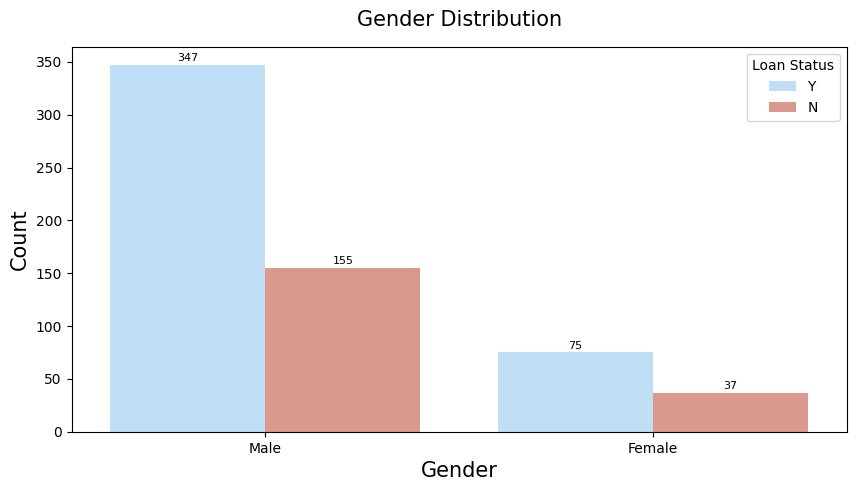

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))
palette = ["#B7E0FF", "#E78F81", "#FFF5CD", "#FFCFB3",]

ax_view = sns.countplot(x="Gender", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Gender Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Gender', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()


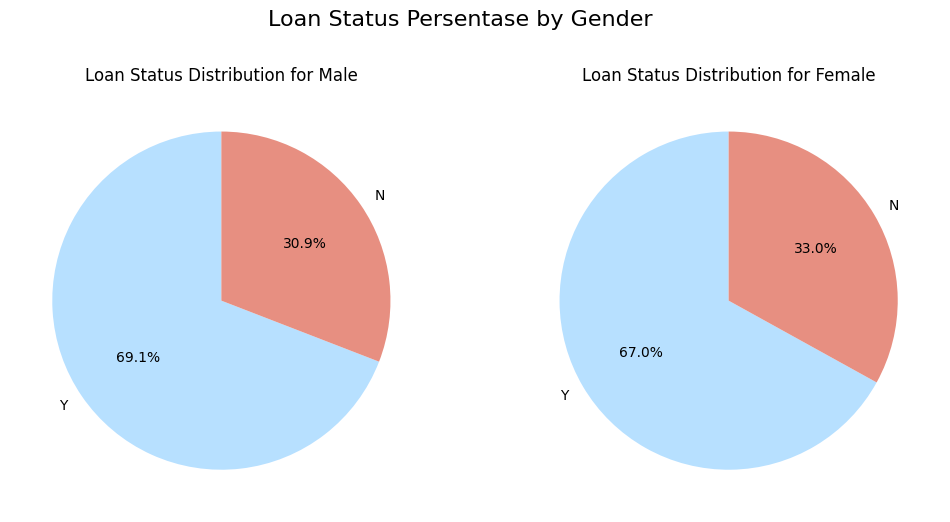

In [ ]:
male_data = df[df['Gender'] == 'Male']['Loan_Status'].value_counts(normalize=True) * 100
female_data = df[df['Gender'] == 'Female']['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(male_data, labels=male_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0].set_title('Loan Status Distribution for Male')

axs[1].pie(female_data, labels=female_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1].set_title('Loan Status Distribution for Female')

plt.suptitle('Loan Status Persentase by Gender', fontsize=16)
plt.show()

Married

<ipython-input-239-d4c8016f0896>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Married", hue="Loan_Status", data=df, palette=palette, ax=axs)


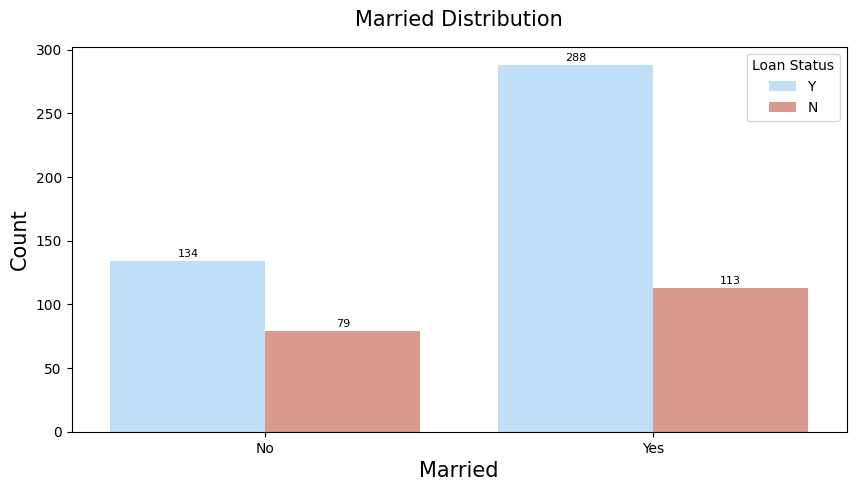

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Married", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Married Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Married', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

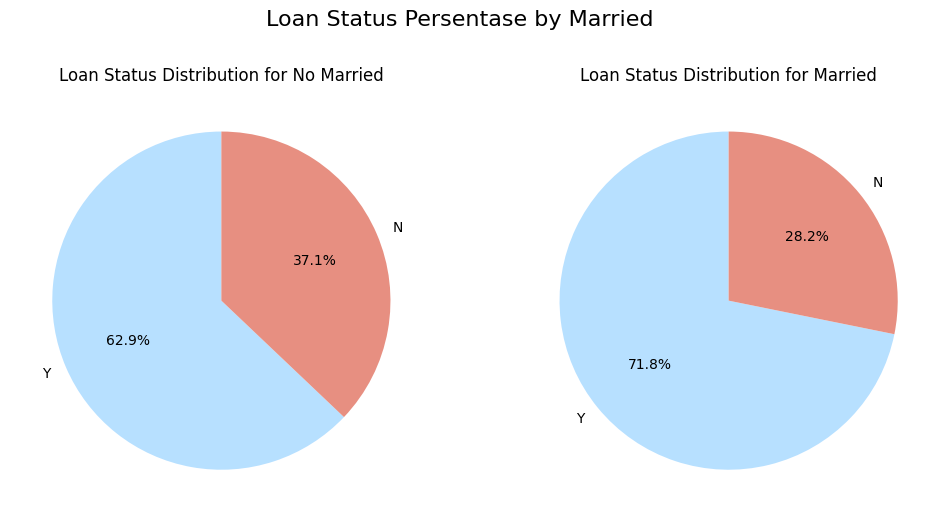

In [ ]:
nomarr_data = df[df['Married'] == 'No']['Loan_Status'].value_counts(normalize=True) * 100
yesmarr_data = df[df['Married'] == 'Yes']['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(nomarr_data, labels=nomarr_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0].set_title('Loan Status Distribution for No Married')

axs[1].pie(yesmarr_data, labels=yesmarr_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1].set_title('Loan Status Distribution for Married')

plt.suptitle('Loan Status Persentase by Married', fontsize=16)
plt.show()

Dependents

<ipython-input-241-4ee9e00f330b>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette=palette, ax=axs)


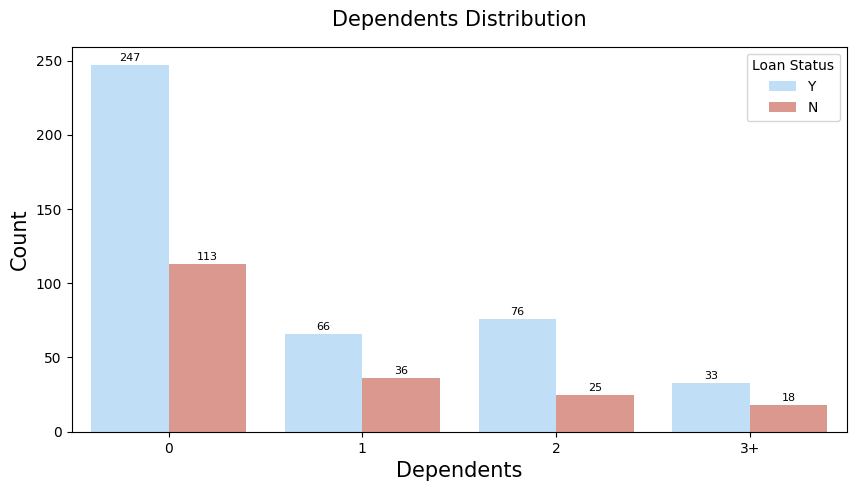

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Dependents Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Dependents', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

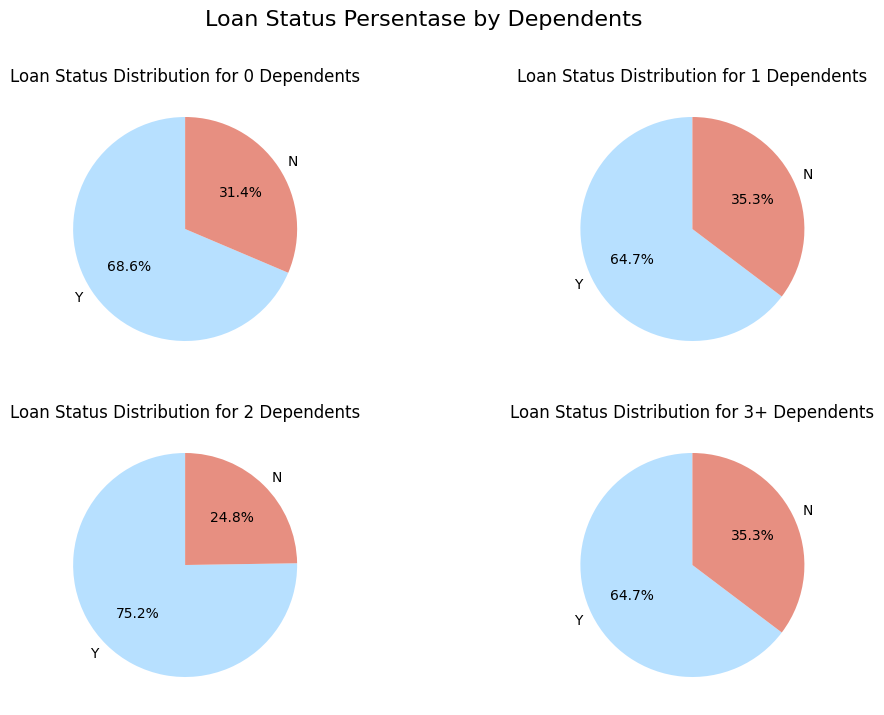

In [ ]:
dep0_data = df[df['Dependents'] == '0']['Loan_Status'].value_counts(normalize=True) * 100
dep1_data = df[df['Dependents'] == '1']['Loan_Status'].value_counts(normalize=True) * 100
dep2_data = df[df['Dependents'] == '2']['Loan_Status'].value_counts(normalize=True) * 100
dep3_data = df[df['Dependents'] == '3+']['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].pie(dep0_data, labels=dep0_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0, 0].set_title('Loan Status Distribution for 0 Dependents')

axs[0, 1].pie(dep1_data, labels=dep1_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0, 1].set_title('Loan Status Distribution for 1 Dependents')

axs[1, 0].pie(dep2_data, labels=dep2_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1, 0].set_title('Loan Status Distribution for 2 Dependents')

axs[1, 1].pie(dep3_data, labels=dep3_data.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1, 1].set_title('Loan Status Distribution for 3+ Dependents')

plt.suptitle('Loan Status Persentase by Dependents', fontsize=16)
plt.show()

Education

<ipython-input-243-22e779e1884e>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Education", hue="Loan_Status", data=df, palette=palette, ax=axs)


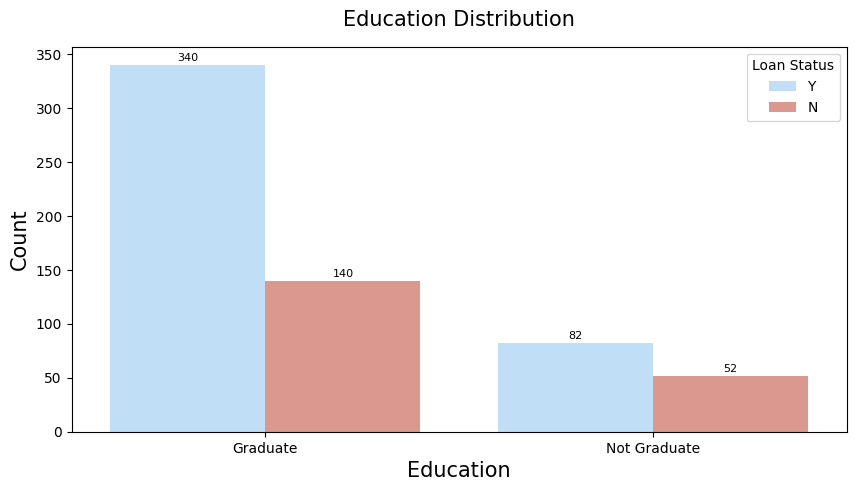

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Education", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Education Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Education', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

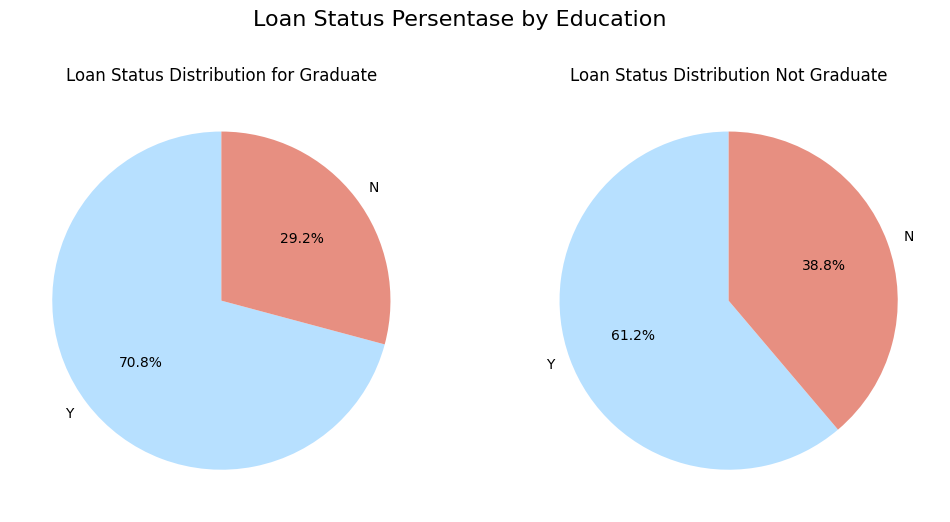

In [ ]:
grad = df[df['Education'] == 'Graduate']['Loan_Status'].value_counts(normalize=True) * 100
nograd = df[df['Education'] == 'Not Graduate']['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(grad, labels=grad.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0].set_title('Loan Status Distribution for Graduate')

axs[1].pie(nograd, labels=nograd.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1].set_title('Loan Status Distribution Not Graduate')

plt.suptitle('Loan Status Persentase by Education', fontsize=16)
plt.show()

Self Employed

<ipython-input-245-c78c088831ac>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df, palette=palette, ax=axs)


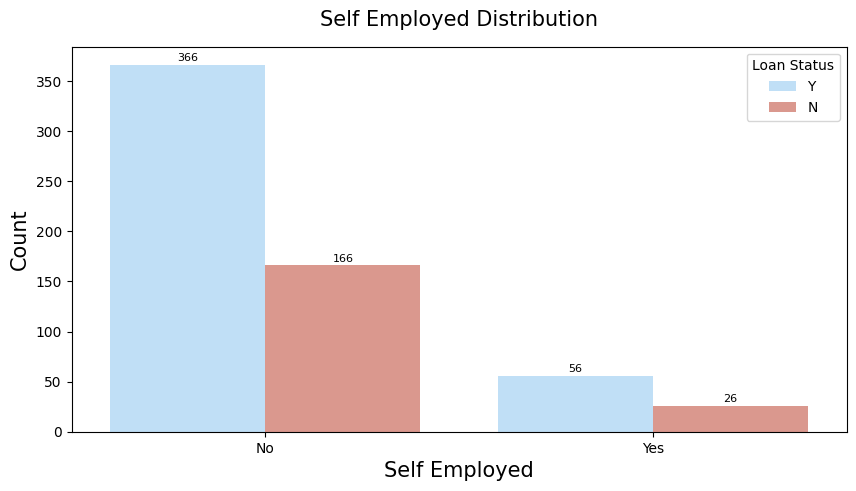

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Self Employed Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Self Employed', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

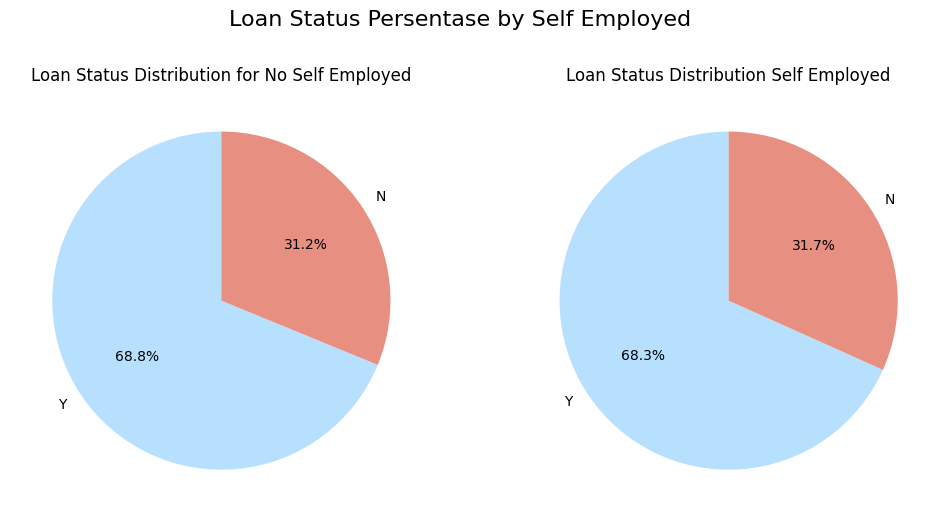

In [ ]:
noemp = df[df['Self_Employed'] == 'No']['Loan_Status'].value_counts(normalize=True) * 100
emp = df[df['Self_Employed'] == 'Yes']['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(noemp, labels=noemp.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0].set_title('Loan Status Distribution for No Self Employed')

axs[1].pie(emp, labels=emp.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1].set_title('Loan Status Distribution Self Employed')

plt.suptitle('Loan Status Persentase by Self Employed', fontsize=16)
plt.show()

<ipython-input-247-9ee67554b099>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df, palette=palette, ax=axs)


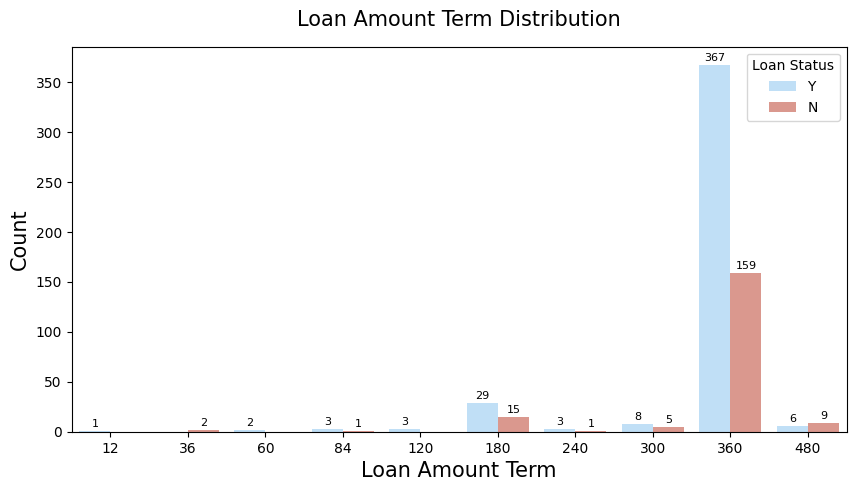

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Loan Amount Term Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Loan Amount Term', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

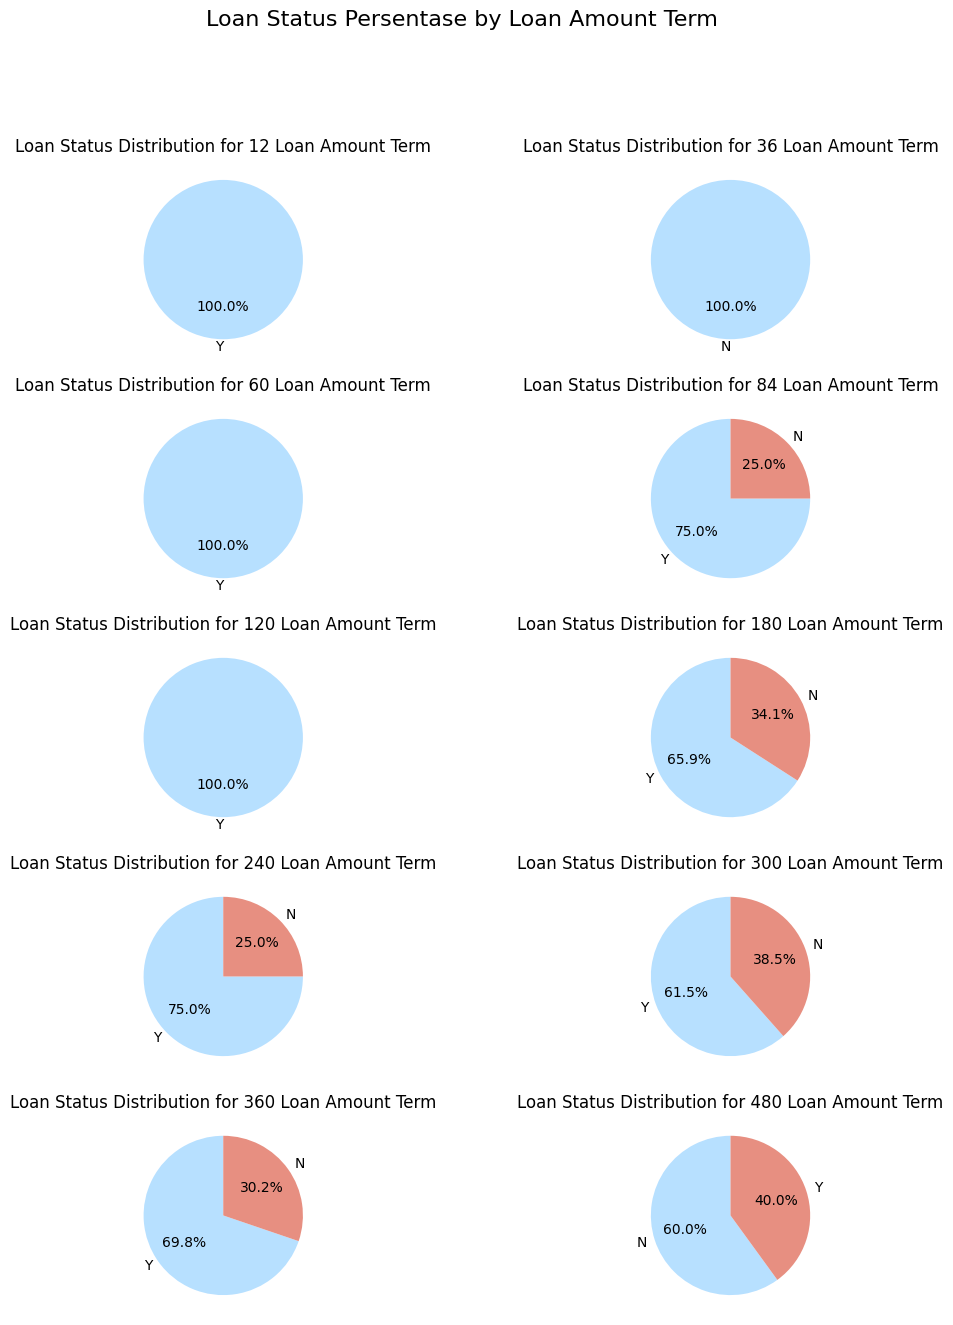

In [ ]:
lat12 = df[df['Loan_Amount_Term'] == 12.0]['Loan_Status'].value_counts(normalize=True) * 100
lat36 = df[df['Loan_Amount_Term'] == 36.0]['Loan_Status'].value_counts(normalize=True) * 100
lat60 = df[df['Loan_Amount_Term'] == 60.0]['Loan_Status'].value_counts(normalize=True) * 100
lat84 = df[df['Loan_Amount_Term'] == 84.0]['Loan_Status'].value_counts(normalize=True) * 100
lat120 = df[df['Loan_Amount_Term'] == 120.0]['Loan_Status'].value_counts(normalize=True) * 100
lat180 = df[df['Loan_Amount_Term'] == 180.0]['Loan_Status'].value_counts(normalize=True) * 100
lat240 = df[df['Loan_Amount_Term'] == 240.0]['Loan_Status'].value_counts(normalize=True) * 100
lat300 = df[df['Loan_Amount_Term'] == 300.0]['Loan_Status'].value_counts(normalize=True) * 100
lat360 = df[df['Loan_Amount_Term'] == 360.0]['Loan_Status'].value_counts(normalize=True) * 100
lat480 = df[df['Loan_Amount_Term'] == 480.0]['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(5, 2, figsize=(12, 15))

axs[0, 0].pie(lat12, labels=lat12.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0, 0].set_title('Loan Status Distribution for 12 Loan Amount Term')

axs[0, 1].pie(lat36, labels=lat36.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0, 1].set_title('Loan Status Distribution for 36 Loan Amount Term')

axs[1, 0].pie(lat60, labels=lat60.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1, 0].set_title('Loan Status Distribution for 60 Loan Amount Term')

axs[1, 1].pie(lat84, labels=lat84.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1, 1].set_title('Loan Status Distribution for 84 Loan Amount Term')

axs[2, 0].pie(lat120, labels=lat120.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[2, 0].set_title('Loan Status Distribution for 120 Loan Amount Term')

axs[2, 1].pie(lat180, labels=lat180.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[2, 1].set_title('Loan Status Distribution for 180 Loan Amount Term')

axs[3, 0].pie(lat240, labels=lat240.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[3, 0].set_title('Loan Status Distribution for 240 Loan Amount Term')

axs[3, 1].pie(lat300, labels=lat300.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[3, 1].set_title('Loan Status Distribution for 300 Loan Amount Term')

axs[4, 0].pie(lat360, labels=lat360.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[4, 0].set_title('Loan Status Distribution for 360 Loan Amount Term')

axs[4, 1].pie(lat480, labels=lat480.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[4, 1].set_title('Loan Status Distribution for 480 Loan Amount Term')

plt.suptitle('Loan Status Persentase by Loan Amount Term', fontsize=16)
plt.show()

<ipython-input-249-4c3379b48aba>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette=palette, ax=axs)


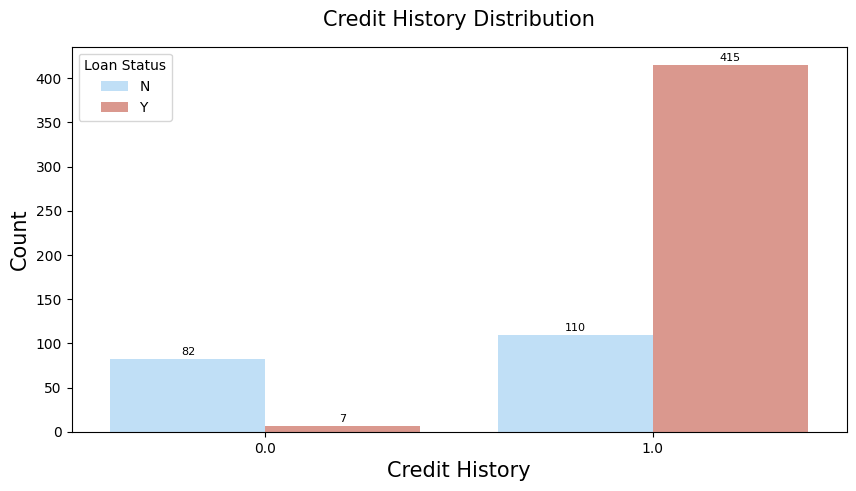

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Credit History Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Credit History', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

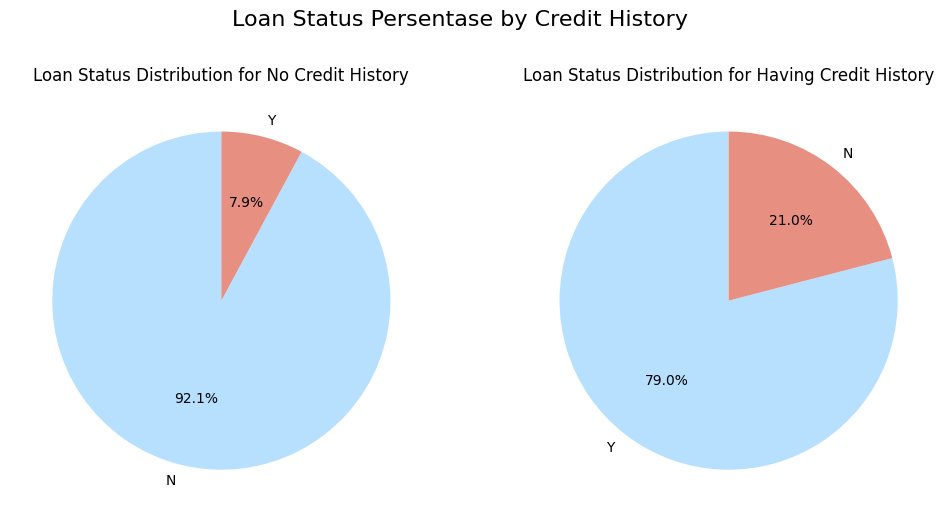

In [ ]:
nohist = df[df['Credit_History'] == 0.0]['Loan_Status'].value_counts(normalize=True) * 100
hist = df[df['Credit_History'] == 1.0]['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(nohist, labels=nohist.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0].set_title('Loan Status Distribution for No Credit History')

axs[1].pie(hist, labels=hist.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1].set_title('Loan Status Distribution for Having Credit History')

plt.suptitle('Loan Status Persentase by Credit History', fontsize=16)
plt.show()

Property Area

<ipython-input-251-836b1162b8cd>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette=palette, ax=axs)


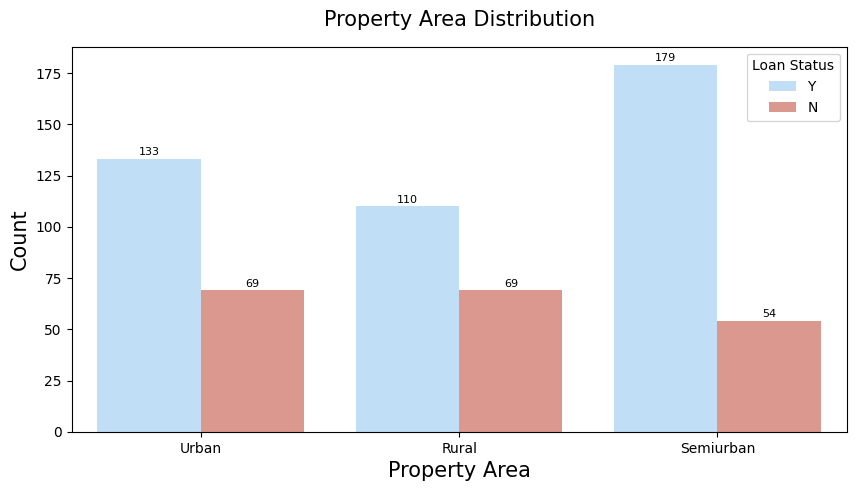

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Property Area Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Property Area', fontsize=15)
axs.legend(title='Loan Status', fontsize=15, prop={'size': 10})

plt.show()

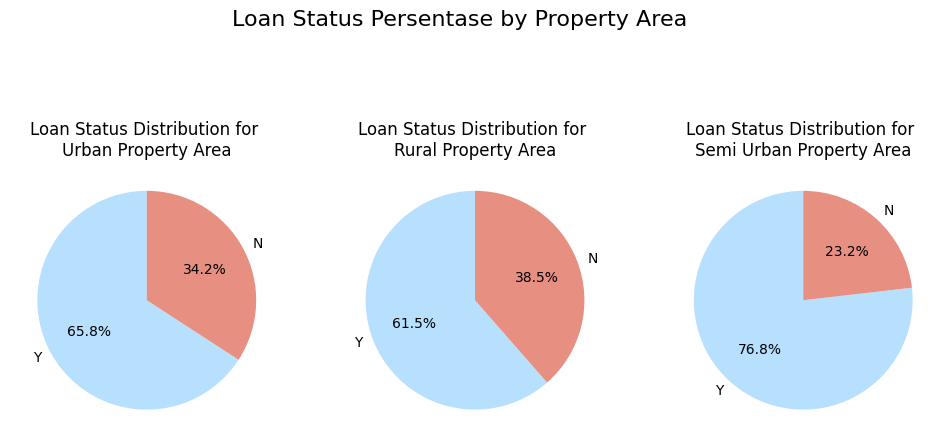

In [ ]:
urban = df[df['Property_Area'] == 'Urban']['Loan_Status'].value_counts(normalize=True) * 100
rural = df[df['Property_Area'] == 'Rural']['Loan_Status'].value_counts(normalize=True) * 100
semiurban = df[df['Property_Area'] == 'Semiurban']['Loan_Status'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].pie(urban, labels=urban.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[0].set_title('Loan Status Distribution for \nUrban Property Area')

axs[1].pie(rural, labels=rural.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[1].set_title('Loan Status Distribution for \nRural Property Area')

axs[2].pie(semiurban, labels=semiurban.index, autopct='%1.1f%%', colors=palette, startangle=90)
axs[2].set_title('Loan Status Distribution for \nSemi Urban Property Area')

plt.suptitle('Loan Status Persentase by Property Area', fontsize=16)
plt.show()

# Data Transformation

In [ ]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,128.0,360,1,2,1
1,1,1,1,0,0,8.430327,7.319202,128.0,360,1,0,0
2,1,1,0,0,1,8.006701,0.000000,66.0,360,1,2,1
3,1,1,0,1,0,7.857094,7.765993,120.0,360,1,2,1
4,1,0,0,0,0,8.699681,0.000000,141.0,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,71.0,360,1,0,1
610,1,1,3,0,0,8.320448,0.000000,40.0,180,1,0,1
611,1,1,1,0,0,8.996280,5.484797,253.0,360,1,2,1
612,1,1,2,0,0,8.933796,0.000000,187.0,360,1,2,1


- Gender:
 - 0 : Female
 - 1 : Male

- Married:
 - 0 : No
 - 1 : Yes

- Dependents:
 - 0 : 0
 - 1 : 1
 - 2 : 2
 - 3 : 3+

- Education:
 - 0 : Graduate
 - 1 : Not Graduate

- Self Employed:
 - 0 : No
 - 1 : Yes

- Credit History :
  - 0 : No
  - 1 : Yes

- Property Area:
 - 0 : Urban
 - 1 : Rural
 - 2 : Semi Urban

- Loan Status:
 - 0 : No
 - 1 : Yes

# Modeling

<ipython-input-254-43be8b6c957e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_view = sns.countplot(x="Loan_Status", data=df, palette=palette, ax=axs)
<ipython-input-254-43be8b6c957e>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax_view = sns.countplot(x="Loan_Status", data=df, palette=palette, ax=axs)


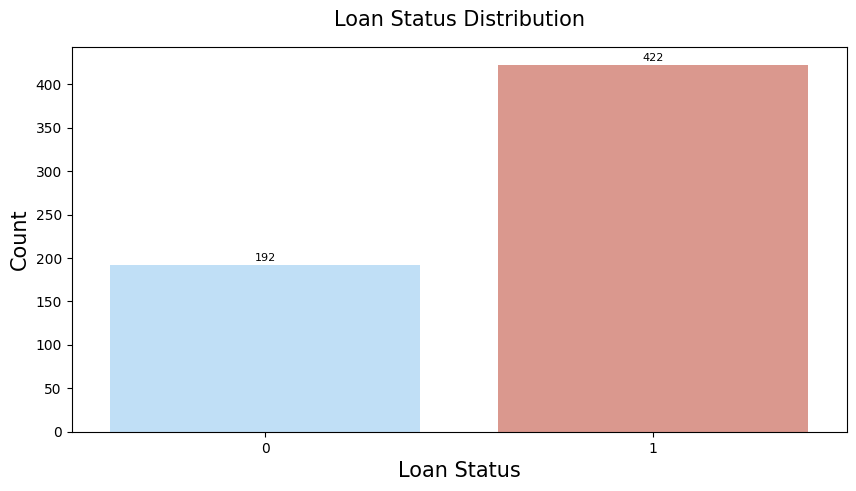

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

ax_view = sns.countplot(x="Loan_Status", data=df, palette=palette, ax=axs)

for bar in ax_view.patches:
    height = int(bar.get_height())
    if height > 0:
        ax_view.annotate(f'{height}',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', fontsize=8, color='black',
                         xytext=(0, 5), textcoords='offset points')

axs.set_title('Loan Status Distribution', fontsize=15, pad=15)
axs.set_ylabel('Count', fontsize=15)
axs.set_xlabel('Loan Status', fontsize=15)

plt.show()

In [ ]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

Mengatasi Data Imbalanced dengan teknik Random Over Sampling

In [ ]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

In [ ]:
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 5, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.778 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.674 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.755 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.762 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.706 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.771 total time=   0.5s
[CV 2/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.674 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.748 total time=   0.4s
[CV 4/5] END max_depth=3, max_fe

In [ ]:
rf_model = model_grid.best_estimator_

In [ ]:
rf_feature_importance = rf_model.feature_importances_
feature_names = X.columns
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df

,Feature,Importance
9,Credit_History,0.290701
5,ApplicantIncome,0.205036
7,LoanAmount,0.172921
6,CoapplicantIncome,0.124319
10,Property_Area,0.054131
2,Dependents,0.042014
8,Loan_Amount_Term,0.037524
1,Married,0.023342
3,Education,0.022444
0,Gender,0.014863


Seleksi Fitur

In [ ]:
selected_features = rf_feature_importance_df.nlargest(4, 'Importance')['Feature']

In [ ]:
selected_features

,Feature
9,Credit_History
5,ApplicantIncome
7,LoanAmount
6,CoapplicantIncome


In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Penentuan Best Parameter

In [ ]:
rf_grid_2 = RandomForestClassifier()
gr_space_2 = {
      'max_depth': [3, 5],
      'n_estimators': [100, 200, 300, 400, 500],
      'max_features': [10, 20, 30 , 40],
      'min_samples_leaf': [1, 2, 4]
}

grid_2 = GridSearchCV(rf_grid_2, gr_space_2, cv = 5, scoring='accuracy', verbose = 3)
model_grid_2 = grid_2.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid_2.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.778 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.681 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.755 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.769 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.706 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.778 total time=   0.4s
[CV 2/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.681 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.741 total time=   0.4s
[CV 4/5] END max_depth=3, max_fea

Evaluasi

In [ ]:
rf_model_2 = model_grid_2.best_estimator_
y_pred_2 = rf_model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2)
f1_skor = f1_score(y_test, y_pred_2)
y_pred_proba = rf_model_2.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
# Tampilkan hasil evaluasi
print("Accuracy:", accuracy_2)
print("Recall:", recall_2)
print("Precision:", precision_2)
print("F1 Score:", f1_skor)
print("auc score:", auc)

Accuracy: 0.7007874015748031
Recall: 1.0
Precision: 0.5824175824175825
F1 Score: 0.7361111111111112
auc score: 0.8740438551759308


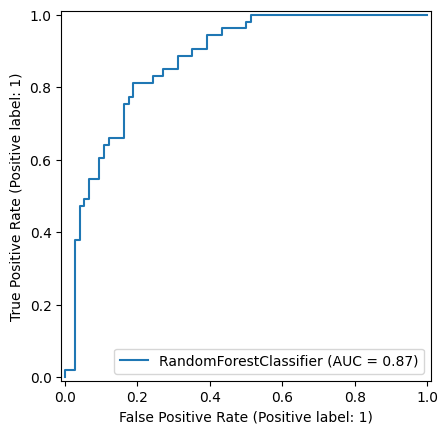

In [ ]:
RocCurveDisplay.from_estimator(rf_model_2, X_test, y_test)
plt.show()

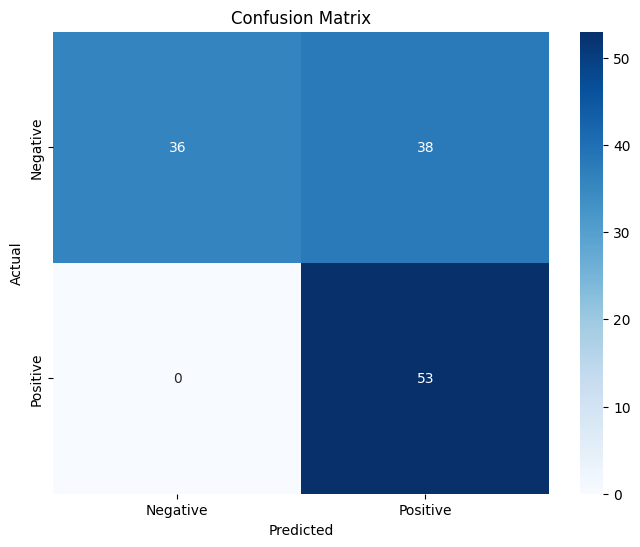

In [ ]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


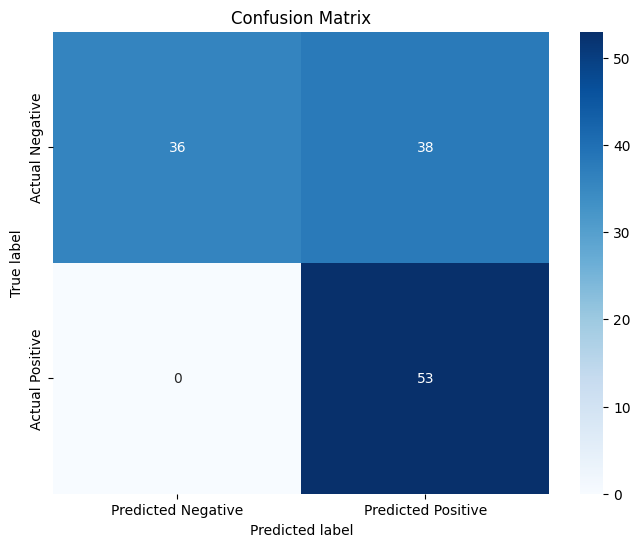

In [ ]:
#hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)

# Visualisasikan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def get_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] == _tree.TREE_UNDEFINED:
            # Ambil nilai kelas dari node daun
            class_value = tree_.value[node].argmax()
            return [f"Class: {class_value}"]

        name = feature_name[node]
        threshold = tree_.threshold[node]

        left_rules = recurse(tree_.children_left[node])
        right_rules = recurse(tree_.children_right[node])

        rules = []
        for rule in left_rules:
            rules.append(f"IF {name} <= {threshold:.2f} THEN {rule}")
        for rule in right_rules:
            rules.append(f"IF {name} > {threshold:.2f} THEN {rule}")

        return rules
    return recurse(0)

In [ ]:
# Buat dictionary untuk menyimpan akurasi tiap tree
tree_accuracies = {}

# Uji setiap tree pada data uji
for i, estimator in enumerate(rf_model_2.estimators_):
    y_pred_2 = estimator.predict(X_test)
    tree_accuracies[i] = accuracy_score(y_test, y_pred_2)

# Ambil tree dengan akurasi tertinggi
best_tree_index = max(tree_accuracies, key=tree_accuracies.get)
best_tree = rf_model_2.estimators_[best_tree_index]

# Output
print(f'The best tree is tree number {best_tree_index}')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: U

The best tree is tree number 162


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: U

Menampilkan Tree

Tree in Random Forest (Tree 162)


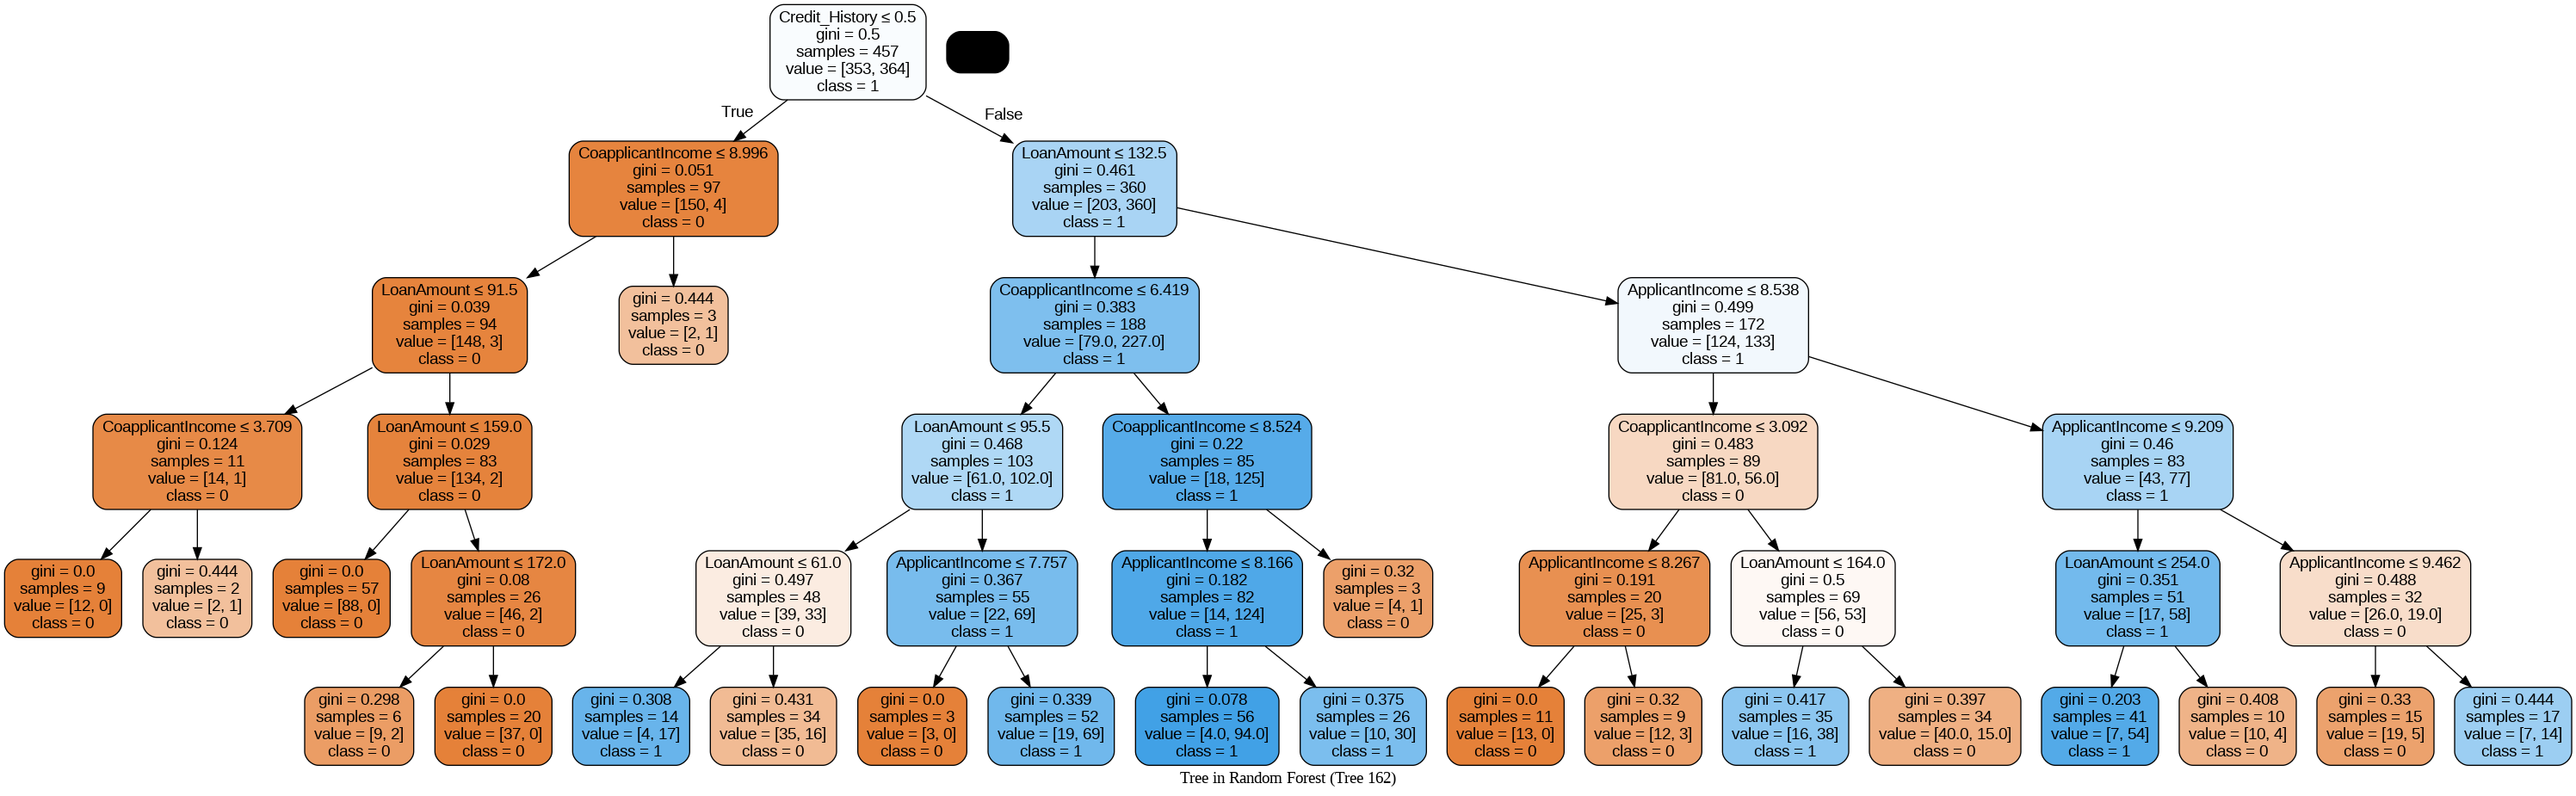

In [ ]:
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in set(y_train)],
    filled=True,
    rounded=True,
    special_characters=True
)

# Buat grafik menggunakan Pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Judul= f"Tree in Random Forest (Tree {best_tree_index})"
graph.set_label(Judul)
print(Judul)
Image(graph.create_png())

In [ ]:
graph.write_png("/content/drive/MyDrive/dataset skb projcet 2/visualisasi_random_forest.png")

True

Menampilkan Aturan

In [ ]:
# Menampilkan aturan best tree
print(f"Best Tree in Random Forest (Tree {best_tree_index})")
rules = get_rules(best_tree, X_train.columns)
for rule in rules:
    print(rule)

Best Tree in Random Forest (Tree 162)
IF Credit_History <= 0.50 THEN IF CoapplicantIncome <= 9.00 THEN IF LoanAmount <= 91.50 THEN IF CoapplicantIncome <= 3.71 THEN Class: 0
IF Credit_History <= 0.50 THEN IF CoapplicantIncome <= 9.00 THEN IF LoanAmount <= 91.50 THEN IF CoapplicantIncome > 3.71 THEN Class: 0
IF Credit_History <= 0.50 THEN IF CoapplicantIncome <= 9.00 THEN IF LoanAmount > 91.50 THEN IF LoanAmount <= 159.00 THEN Class: 0
IF Credit_History <= 0.50 THEN IF CoapplicantIncome <= 9.00 THEN IF LoanAmount > 91.50 THEN IF LoanAmount > 159.00 THEN IF LoanAmount <= 172.00 THEN Class: 0
IF Credit_History <= 0.50 THEN IF CoapplicantIncome <= 9.00 THEN IF LoanAmount > 91.50 THEN IF LoanAmount > 159.00 THEN IF LoanAmount > 172.00 THEN Class: 0
IF Credit_History <= 0.50 THEN IF CoapplicantIncome > 9.00 THEN Class: 0
IF Credit_History > 0.50 THEN IF LoanAmount <= 132.50 THEN IF CoapplicantIncome <= 6.42 THEN IF LoanAmount <= 95.50 THEN IF LoanAmount <= 61.00 THEN Class: 1
IF Credit_Histo